Predict Award Share<br>

Input File: 'data_clean.csv' <br>

Output File 1: 'result_approach1.csv' for hyperparam tuning<br>
Output File 2: 'result_compare_approach1.csv' for best model (Not Neural Netwok) prediction comparion of each year<br>
Output File 3: 'result_compare_nn_approach1.csv'for best Neural Network model prediction comparion of each year<br>
Output File 4: 'namelist_approach1.csv' for predicted 2020 namelist (Not Neural Network)<br>
Output File 5: 'namelist_nn_approach1.csv' for predicted 2020 namelist (Neural Network)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas.util.testing as tm

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet,LogisticRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error

C:\Users\Can SONG\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  """


In [4]:
data = pd.read_csv('data_clean.csv',index_col = False)

In [5]:
#from the data description use award_share as y variable
year = 'season'
player = 'player'
num_col = ['vorp', 'fta', 'efg', 'stl', 'trb', 'blk', 'fg%', 'ft%', 'tov', 'g', 'ast', '3p%', 'fg3a', 'pf', 'mp', 'fga', 'age', 'experience', 'vorp_rt', 'vorp_sq', 'fta_rt', 'fta_sq', 'efg_rt', 'efg_sq', 'stl_rt', 'stl_sq', 'trb_rt', 'trb_sq', 'blk_rt', 'blk_sq', 'fg%_rt', 'fg%_sq', 'ft%_rt', 'ft%_sq', 'tov_rt', 'tov_sq', 'g_rt', 'g_sq', 'ast_rt', 'ast_sq', '3p%_rt', '3p%_sq', 'fg3a_rt', 'fg3a_sq', 'pf_rt', 'pf_sq', 'mp_rt', 'mp_sq', 'fga_rt', 'fga_sq', 'age_rt', 'age_sq', 'experience_rt', 'experience_sq']
dummy_col = ['pos_C', 'pos_PF', 'pos_PG', 'pos_SF', 'pos_SG',
             'team_ATL', 'team_BOS', 'team_BRK', 'team_CHA', 
             'team_CHH', 'team_CHI', 'team_CHO', 'team_CLE', 
             'team_DAL', 'team_DEN', 'team_DET', 'team_GSW', 
             'team_HOU', 'team_IND', 'team_KCK', 'team_LAC', 'team_LAL', 'team_MEM', 'team_MIA', 'team_MIL', 'team_MIN', 'team_NJN', 'team_NOH', 'team_NOP', 'team_NYK', 'team_OKC', 'team_ORL', 'team_PHI', 'team_PHO', 'team_POR', 'team_SAC', 'team_SAS', 'team_SEA', 'team_TOR', 'team_TOT', 'team_UTA', 'team_WAS', 'team_WSB']
X_col =  num_col.copy()
X_col.extend(dummy_col)
y_col =  'award_share'

In [4]:
def mean_absolute_percentage_error(y_val,y_predict):
    y_val,y_predict = np.array(y_val),np.array(y_predict)
    return np.mean(np.abs((y_val - y_predict) / y_val))

In [10]:
#normalize the numericate cols
def norm_num(X_train):    
    X_train_num =pd.DataFrame(StandardScaler().fit_transform(X_train[num_col]))
    X_train_dummy = pd.DataFrame(X_train[dummy_col].to_numpy())
    X_train = pd.concat([X_train_num,X_train_dummy],axis = 1).to_numpy()
    return X_train

In [6]:
#set the params for each model
def get_Ridge_param():
    param = []
    for alpha in [1e-5,1e-4,1e-3,0.01,0.1]:
        param.append({'alpha':alpha,'random_state':221})
    return param

def get_Lasso_param():
    param = []
    for alpha in [1e-5,1e-4,1e-3,0.01,0.1]:
        param.append({'alpha':alpha,'random_state':221})
    return param

def get_ElasticNet_param():
    param = []
    for alpha in [1e-5,1e-4,1e-3,0.01,0.1]:
        for l1_ratio in [0.1,0.3,0.5,0.7,0.9]:
            param.append({'alpha':alpha,'l1_ratio':l1_ratio,'random_state':221})
    return param

def get_SVR_param():
    param = []
    for kernel in ['linear','rbf','sigmoid']:
        for C in [0.1,1,10,100,1000]:
            param.append({'kernel':kernel,'C':C})
    kernel = 'poly'
    for degree in [2,3,4,5]:
        for C in [0.1,1,10,100,1000]:
            param.append({'kernel':kernel,'degree':degree,'C':C})
    return param

def get_RandomForestRegressor_param():
    param = []
    for n_estimators in [50,100,200]:
        for criterion in ['mse','mae']:
            param.append({'n_estimators':n_estimators,'criterion':criterion,'random_state':221})
    return param

def get_GradientBoostingRegressor_param():
    param = []
    for learning_rate in [0.001,0.01,0.1,1]:
        for n_estimators in [10,100,200]:
            param.append({'learning_rate':learning_rate,'n_estimators':n_estimators,'random_state':221})
    return param

def get_AdaBoostRegressor_param():
    param = []
    for learning_rate in [0.001,0.01,0.1,1]:
        for n_estimators in [10,100,200]:
            param.append({'learning_rate':learning_rate,'n_estimators':n_estimators,'random_state':221})
    return param

def get_MLPRegressor_param():
    param = []
    for alpha in [1e-4,1e-5,1e-6]:
        for hidden_layer_sizes in [(100,),(200,),(300,)]:
            param.append({'alpha':alpha,'hidden_layer_sizes':hidden_layer_sizes,'random_state':221})
    return param


In [7]:
models = [LinearRegression,Ridge,Lasso,ElasticNet,SVR,RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,MLPRegressor]

#models = [LinearRegression,Ridge,Lasso,ElasticNet,MLPRegressor]

param = {
    LinearRegression.__name__:[{}],         
    Ridge.__name__:get_Ridge_param(),
    Lasso.__name__:get_Lasso_param(),
    ElasticNet.__name__:get_ElasticNet_param(),
    SVR.__name__:get_SVR_param(),
    RandomForestRegressor.__name__:get_RandomForestRegressor_param(),
    GradientBoostingRegressor.__name__:get_GradientBoostingRegressor_param(),
    AdaBoostRegressor.__name__:get_AdaBoostRegressor_param(),
    MLPRegressor.__name__:get_MLPRegressor_param(),
}

In [8]:
i = 0
#result for each model each param
result = pd.DataFrame(columns = ['model','param','mae_avg','mse_avg','mape_avg','mvp_avg','top3_order_avg','top3_coverage_avg','mvp_in_top3_avg','mvp_in_top5_avg'])
best_mvp_avg = 0
best_nn_mvp_avg = 0

for m in models:    
    for index,p in enumerate(param[m.__name__]):
        mae = []
        mse = []
        mape = []
        mvp = []
        top3_order = []
        top3_coverage = []
        mvp_in_top3 = []
        mvp_in_top5 = []
        for s in list(set(data['season_x'].values).difference(set([2020]))):
            #2020 didn't have target share data
            data_temp = data[data['season_x'] != 2020]
            #train_test split
            X_train = data_temp[data_temp['season_x'] != s][X_col]
            y_train = data_temp[data_temp['season_x'] != s][y_col]
            X_val = data_temp[data_temp['season_x'] == s][X_col]
            y_val = data_temp[data_temp['season_x'] == s][y_col]
            #normalize the numerical columns separately for train and validation set
            X_train = norm_num(X_train)
            X_val = norm_num(X_val)
            #predict the validation set
            model = m(**p)
            model.fit(X_train,y_train)
            y_predict = model.predict(X_val)
            #evaluation
            #mae
            mae.append(mean_absolute_error(y_val,y_predict))
            #mse
            mse.append(mean_squared_error(y_val,y_predict))
            #mape
            mape.append(mean_absolute_percentage_error(y_val,y_predict))
            #whehter correctly predict mvp
            mvp.append(np.sum(np.argmax(y_predict)== np.argmax(y_val.to_numpy())))
            #whether correctly predict first 3
            if np.sum(np.argsort(y_val.to_numpy())[::-1][:3] == np.argsort(y_predict)[::-1][:3]) == 3:
                top3_order.append(1)
            else:
                top3_order.append(0)
            #percentage of top 3 predictions are in true top 3 list
            top3_coverage.append((3 - len(set(np.argsort(y_val.to_numpy())[::-1][:3]).difference(set(np.argsort(y_predict)[::-1][:3]))))/3)
            #mvp_in_top3
            mvp_in_top3.append(np.sum(np.argsort(y_val.to_numpy())[::-1][:1] in np.argsort(y_predict)[::-1][:3]))
            #mvp_in_top5
            mvp_in_top5.append(np.sum(np.argsort(y_val.to_numpy())[::-1][:1] in np.argsort(y_predict)[::-1][:5]))
        
        #average the evaluation over all years
        mae_avg = np.mean(mae)
        mse_avg = np.mean(mse)
        mape_avg = np.mean(mape)
        mvp_avg = np.mean(mvp)
        top3_order_avg = np.mean(top3_order)
        top3_coverage_avg = np.mean(top3_coverage)
        mvp_in_top3_avg = np.mean(mvp_in_top3)
        mvp_in_top5_avg = np.mean(mvp_in_top5)
        
        #add each result to the result table
        result.loc[i] = [m.__name__,p,mae_avg,mse_avg,mape_avg,mvp_avg,top3_order_avg,top3_coverage_avg,mvp_in_top3_avg,mvp_in_top5_avg]
        i += 1
        
        #select the best model for ml and dnn
        if m.__name__ != 'MLPRegressor':
            if mvp_avg > best_mvp_avg:
                best_mvp_avg = mvp_avg
                best_model = model
                print('Current Best MVP AVG:', mvp_avg)
                print('Current Best Model:' ,model)
        else:
            if mvp_avg > best_nn_mvp_avg:
                best_nn_mvp_avg = mvp_avg
                best_nn_model = model
                print('Current Best NN MVP AVG:', mvp_avg)
                print('Current Best NN Model:' ,model)
result.to_csv('result_approach1.csv')

C:\Users\Carmen\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


Current Best MVP AVG: 0.5263157894736842
Current Best Model: LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)


C:\Users\Carmen\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


Current Best MVP AVG: 0.5526315789473685
Current Best Model: Ridge(alpha=1e-05, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=221, solver='auto', tol=0.001)


C:\Users\Carmen\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Carmen\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Current Best MVP AVG: 0.5789473684210527
Current Best Model: SVR(C=1, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


C:\Users\Carmen\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Carmen\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Carmen\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Carmen\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Carmen\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel

C:\Users\Carmen\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Carmen\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Carmen\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Carmen\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Carmen\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel

C:\Users\Carmen\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Carmen\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Carmen\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Carmen\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Carmen\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel

C:\Users\Carmen\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Carmen\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Carmen\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Carmen\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Carmen\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel

C:\Users\Carmen\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Carmen\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Carmen\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Carmen\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Carmen\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel

C:\Users\Carmen\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Carmen\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Carmen\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Carmen\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Carmen\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel

C:\Users\Carmen\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Carmen\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Carmen\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Carmen\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Carmen\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel

C:\Users\Carmen\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Carmen\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Carmen\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Carmen\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Carmen\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel

C:\Users\Carmen\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Carmen\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Carmen\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Carmen\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Carmen\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel

C:\Users\Carmen\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Carmen\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Carmen\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Carmen\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Carmen\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel

C:\Users\Carmen\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Carmen\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Carmen\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Carmen\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Carmen\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel

C:\Users\Carmen\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Carmen\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Carmen\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Carmen\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Carmen\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel

C:\Users\Carmen\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Carmen\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Carmen\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Carmen\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Carmen\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel

C:\Users\Carmen\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Carmen\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Carmen\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Carmen\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Carmen\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel

C:\Users\Carmen\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Carmen\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Carmen\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Carmen\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Carmen\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel

C:\Users\Carmen\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Carmen\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Carmen\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Carmen\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Carmen\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel

C:\Users\Carmen\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Carmen\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Carmen\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Carmen\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Carmen\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel

Current Best NN MVP AVG: 0.47368421052631576
Current Best NN Model: MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=221,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)


C:\Users\Carmen\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


Current Best NN MVP AVG: 0.5263157894736842
Current Best NN Model: MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(200,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=221,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)


C:\Users\Carmen\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


Current Best NN MVP AVG: 0.6052631578947368
Current Best NN Model: MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(300,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=221,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)


C:\Users\Carmen\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


In [9]:
result

,model,param,mae_avg,mse_avg,mape_avg,mvp_avg,top3_order_avg,top3_coverage_avg,mvp_in_top3_avg,mvp_in_top5_avg
0,LinearRegression,{},7.920319e+08,5.244350e+20,inf,0.526316,0.026316,0.675439,0.921053,0.921053
1,Ridge,"{'alpha': 1e-05, 'random_state': 221}",1.035484e-01,2.226870e-02,inf,0.552632,0.026316,0.675439,0.921053,0.921053
2,Ridge,"{'alpha': 0.0001, 'random_state': 221}",1.035304e-01,2.226439e-02,inf,0.552632,0.026316,0.675439,0.921053,0.921053
3,Ridge,"{'alpha': 0.001, 'random_state': 221}",1.034069e-01,2.223441e-02,inf,0.552632,0.052632,0.684211,0.921053,0.921053
4,Ridge,"{'alpha': 0.01, 'random_state': 221}",1.031231e-01,2.216051e-02,inf,0.552632,0.052632,0.684211,0.921053,0.921053
...,...,...,...,...,...,...,...,...,...,...
105,MLPRegressor,"{'alpha': 1e-05, 'hidden_layer_sizes': (200,),...",1.442499e-01,3.810927e-02,inf,0.526316,0.026316,0.649123,0.868421,0.921053
106,MLPRegressor,"{'alpha': 1e-05, 'hidden_layer_sizes': (300,),...",1.255593e-01,3.028425e-02,inf,0.605263,0.026316,0.649123,0.842105,0.921053
107,MLPRegressor,"{'alpha': 1e-06, 'hidden_layer_sizes': (100,),...",1.408248e-01,3.680791e-02,inf,0.473684,0.052632,0.622807,0.842105,0.894737
108,MLPRegressor,"{'alpha': 1e-06, 'hidden_layer_sizes': (200,),...",1.443660e-01,3.812874e-02,inf,0.526316,0.026316,0.649123,0.868421,0.921053


In [10]:
best_model

SVR(C=1, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [11]:
best_nn_model

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(300,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=221,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

Compare the best model result for each year

In [12]:
#print the prediction for each year of best_model
result_compare = pd.DataFrame(index = data.index,columns = ['season','player','true','true_rank','pred','pred_rank'])
for s in list(set(data['season_x'].values).difference(set([2020]))):
    #2020 didn't have target share data
    data_temp = data[data['season_x'] != 2020]
    #train_test split
    X_train = data_temp[data_temp['season_x'] != s][X_col]
    y_train = data_temp[data_temp['season_x'] != s][y_col]
    X_val = data_temp[data_temp['season_x'] == s][X_col]
    y_val = data_temp[data_temp['season_x'] == s][y_col]
    #normalize the numerical columns separately for train and validation set
    X_train = norm_num(X_train)
    X_val = norm_num(X_val)
    #predict the validation set
    model = best_model
    model.fit(X_train,y_train)
    y_predict = model.predict(X_val)
    result_compare['player'].loc[y_val.index] = data_temp[data_temp['season_x'] == s]['player']
    result_compare['season'].loc[y_val.index] = data_temp[data_temp['season_x'] == s]['season_x']
    result_compare['true'].loc[y_val.index] = y_val
    result_compare['true_rank'].loc[y_val.index] = y_val.rank(method = 'dense',ascending = False)
    result_compare['pred'].loc[y_val.index] = y_predict
    result_compare['pred_rank'].loc[y_val.index] = pd.Series(y_predict,index = y_val.index).rank(method = 'dense',ascending = False)

In [13]:
result_compare.to_csv('result_compare_approach1.csv')

In [14]:
#print the prediction for each year of best_model
result_compare = pd.DataFrame(index = data.index,columns = ['season','player','true','true_rank','pred','pred_rank'])
for s in list(set(data['season_x'].values).difference(set([2020]))):
    #2020 didn't have target share data
    data_temp = data[data['season_x'] != 2020]
    #train_test split
    X_train = data_temp[data_temp['season_x'] != s][X_col]
    y_train = data_temp[data_temp['season_x'] != s][y_col]
    X_val = data_temp[data_temp['season_x'] == s][X_col]
    y_val = data_temp[data_temp['season_x'] == s][y_col]
    #normalize the numerical columns separately for train and validation set
    X_train = norm_num(X_train)
    X_val = norm_num(X_val)
    #predict the validation set
    model = best_nn_model
    model.fit(X_train,y_train)
    y_predict = model.predict(X_val)
    result_compare['player'].loc[y_val.index] = data_temp[data_temp['season_x'] == s]['player']
    result_compare['season'].loc[y_val.index] = data_temp[data_temp['season_x'] == s]['season_x']
    result_compare['true'].loc[y_val.index] = y_val
    result_compare['true_rank'].loc[y_val.index] = y_val.rank(method = 'dense',ascending = False)
    result_compare['pred'].loc[y_val.index] = y_predict
    result_compare['pred_rank'].loc[y_val.index] = pd.Series(y_predict,index = y_val.index).rank(method = 'dense',ascending = False)

In [15]:
result_compare.to_csv('result_compare_nn_approach1.csv')

predict 2020

In [29]:
#as the best 2 MLP and Gradient Boost doesn't have feature importance/coefficient
#use gradient boosting
data_temp = data[data['season_x'] != 2020]
X_train = data_temp[X_col]
y_train = data_temp[y_col]
X_val = data[data['season_x'] == 2020][X_col]
#use best model to predict 2020
model = best_model
model.fit(X_train,y_train)
y_predict = model.predict(X_val)

predict_share = pd.DataFrame(data = y_predict,columns = ['predict_share'],index = data[data['season_x'] == 2020]['player'].to_list())
predict_share = predict_share.sort_values('predict_share',ascending= False)

In [30]:
predict_share.to_csv('namelist_approach1.csv')

In [31]:
data_temp = data[data['season_x'] != 2020]
X_train = data_temp[X_col]
y_train = data_temp[y_col]
X_val = data[data['season_x'] == 2020][X_col]
#predict 2020
X_train = norm_num(X_train)
X_val = norm_num(X_val)
#use best model to predict 2020
model = best_nn_model
model.fit(X_train,y_train)
y_predict = model.predict(X_val)

predict_share = pd.DataFrame(data = y_predict,columns = ['predict_share'],index = data[data['season_x'] == 2020]['player'].to_list())
predict_share = predict_share.sort_values('predict_share',ascending= False)

In [32]:
predict_share.to_csv('namelist_nn_approach1.csv')

derive importance plot

In [33]:
#as the best 2 MLP and Gradient Boost doesn't have feature importance/coefficient
#use gradient boosting
data_temp = data[data['season_x'] != 2020]
X_train = data_temp[X_col]
y_train = data_temp[y_col]
X_val = data[data['season_x'] == 2020][X_col]
#use best model to predict 2020
model = GradientBoostingRegressor(learning_rate = 0.01, n_estimators = 200, random_state = 221)
model.fit(X_train,y_train)
y_predict = model.predict(X_val)

predict_share = pd.DataFrame(data = y_predict,columns = ['predict_share'],index = data[data['season_x'] == 2020]['player'].to_list())
predict_share = predict_share.sort_values('predict_share',ascending= False)

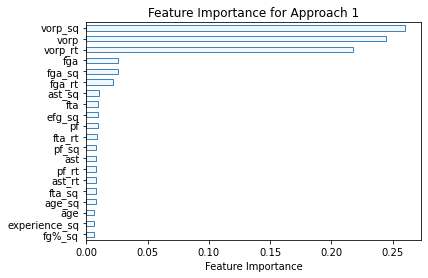

In [25]:
#importance plot
importance = pd.Series(model.feature_importances_,index = X_col)
importance.sort_values()[-20:].plot.barh(color = 'aliceblue',edgecolor = 'steelblue')
plt.title('Feature Importance for Approach 1')
plt.xlabel('Feature Importance')
plt.show()